In [1]:
import PDolar as PE
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# between days

today = dt(2024, 8, 24)
begin_date = dt(2024, 8, 15)

range_data = PE.load_data(begin_date, today)
last_data = PE.last_days_data(days = 3)
day_data = PE.load_day_data(today)



<!-- ui -> create a filter (banks), between_days (date input), exchange houses,  -->
<!-- ui -> (Para el dato mas actualizado) seleccionar operacion | ordenar de mejor a menor -->

<!-- ideas: crear la diferencia entre buy y cost -->
<!-- para varios dias: solo plotear la media de buy_cost, sale_cost -->
<!-- para un dia plotear  por time, -->

# Last Tracker

In [4]:
from PDolar.api import PeruDolar as PE_l
import pandas as pd
tracker = PE_l(id = None)

last_houses = tracker.houses
cols_numeric = ['buy_cost', 'buy_variation', 'sale_cost', 'sale_variation']
last_houses[cols_numeric] = last_houses[cols_numeric].apply(pd.to_numeric)

# last_houses['buy_cost']

last_houses['spread'] = last_houses['sale_cost'] - last_houses['buy_cost']
# tracker.houses
options = ["c dolares", "c soles", 'spread']
option = options[0]

if option == 'c dolares':
    col = 'buy_cost'
    best_sale = True #-> ascending sale_cost
    last_houses = last_houses[last_houses[col] > 0].sort_values(col, ascending=True)
elif option == 'c soles':
    col = 'sale_cost'
    last_houses = last_houses[last_houses[col] > 0].sort_values(col, ascending=False)
elif option == 'spread':
    col = 'spread'
    last_houses = last_houses[last_houses[col] > 0].sort_values(col, ascending=True)

last_houses.head(2)


,companny_name,img,companny_url,banks,days_open,last_updated,buy_cost,buy_variation,sale_cost,sale_variation,spread
20,Rissan,https://s3-ced-uploads-01.s3.amazonaws.com/170...,https://rissanpe.com/?utm_source=ced&utm_mediu...,BCP,"{'M_F': '9 am - 6pm', 'Saturdays': '9 am - 1pm...",2024-01-28T03:06:47.540Z,3.73,0.00,3.775,0.005,0.045
15,Perú dolar,https://s3-ced-uploads-01.s3.amazonaws.com/171...,https://perudolar.pe/?utm_source=ced&utm_mediu...,BCP,"{'M_F': '9 am - 4 pm', 'Saturdays': '-', 'Sund...",2024-08-16T23:00:34.133Z,3.74,0.01,3.767,-0.003,0.027


# Exchange Houses

In [23]:
# range_data['he'].query('sale_cost > 0')

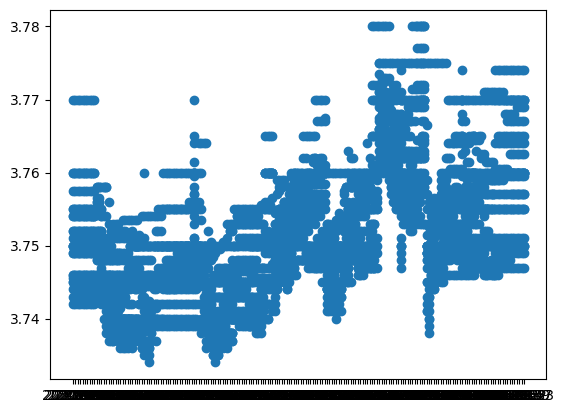

In [5]:
he_range = range_data['he']
plt.scatter("time", "sale_cost", data=range_data['he'].query('sale_cost > 0'))

In [6]:
range_data['bank']

,name,type,buy_cost,buy_variation,sale_cost,sale_variation,time,day
0,bbva,bank,3.653,-0.009,3.826,0.020,20:49:22,15-08-2024
1,scotiabank,bank,3.655,0.006,3.830,0.011,20:49:22,15-08-2024
2,Interbank,bank,3.670,-0.004,3.800,0.016,20:49:22,15-08-2024
3,bcp,bank,3.698,0.006,3.786,0.009,20:49:22,15-08-2024
4,nacion,bank,3.710,0.000,3.780,0.000,20:49:22,15-08-2024
...,...,...,...,...,...,...,...,...
1921,nacion,bank,3.730,0.000,3.790,0.000,18:40:33,24-08-2024
1922,Yuan,currency,0.450,-0.010,0.540,0.000,18:40:33,24-08-2024
1923,canada,currency,2.650,-0.040,2.795,-0.005,18:40:33,24-08-2024
1924,euro ocoña,currency,4.213,0.000,4.230,0.010,18:40:33,24-08-2024


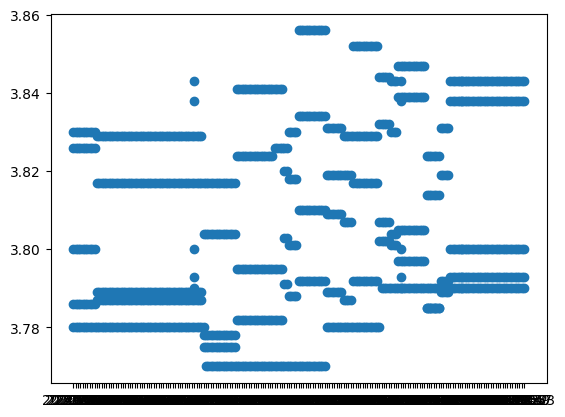

In [7]:
plt.scatter("time", "sale_cost", data=range_data['bank'].query('type == "bank"'))

In [8]:
range_data['bank'].query('type != "bank"')

,name,type,buy_cost,buy_variation,sale_cost,sale_variation,time,day
5,Yuan,currency,0.450,-0.010,0.540,0.000,20:49:22,15-08-2024
6,canada,currency,2.690,0.050,2.800,0.000,20:49:22,15-08-2024
7,euro ocoña,currency,4.170,0.005,4.190,0.005,20:49:22,15-08-2024
8,Libra,currency,4.880,-0.040,5.010,0.020,20:49:22,15-08-2024
14,Yuan,currency,0.450,-0.010,0.540,0.000,22:08:47,15-08-2024
...,...,...,...,...,...,...,...,...
1916,Libra,currency,4.850,-0.010,4.990,0.000,18:20:47,24-08-2024
1922,Yuan,currency,0.450,-0.010,0.540,0.000,18:40:33,24-08-2024
1923,canada,currency,2.650,-0.040,2.795,-0.005,18:40:33,24-08-2024
1924,euro ocoña,currency,4.213,0.000,4.230,0.010,18:40:33,24-08-2024


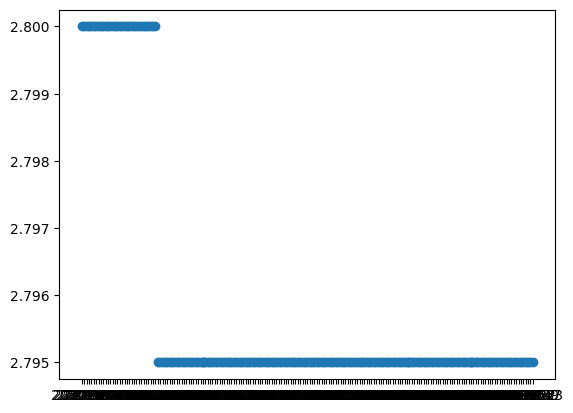

In [9]:
plt.scatter("time", "sale_cost", data=range_data['bank'].query('type != "bank" and name == "canada"'))